## Height-Weight Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\abc\AppData\Local\Temp\ipykernel_9864\3610919214.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
hw = pd.read_csv('height-weight.csv')
hw

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [3]:
hw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


Text(0, 0.5, 'Height')

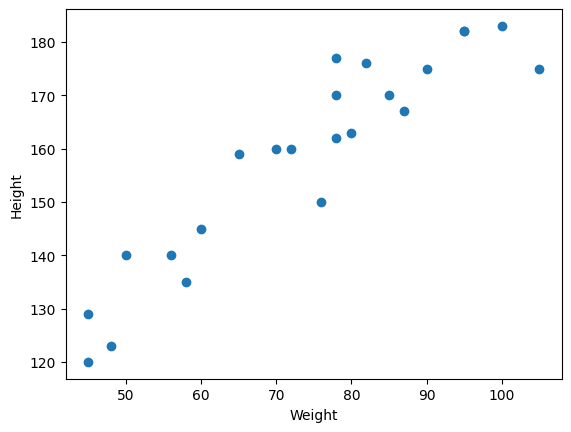

In [4]:
plt.scatter(hw['Weight'],hw['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [5]:
hw.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [6]:
# Devide Dataset into independent and dependent features
x = hw[['Weight']]  #Independent Feature
y = hw['Height']  #Dependent Feature

In [7]:
x.shape, y.shape

((23, 1), (23,))

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# split data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=40)

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# high data ne mediam data ma conver kare means k mean ne 0 per set kre standard deviation thi value set kre
scaler = StandardScaler()

In [13]:
x_train = scaler.fit_transform(x_train) # jyare data ne set and sget banne krva hoi tyare
x_train

array([[ 1.41359307],
       [ 1.14964416],
       [-1.48984498],
       [ 0.7273259 ],
       [-1.48984498],
       [ 0.25221785],
       [ 0.62174633],
       [-1.22589607],
       [ 0.46337698],
       [-0.69799824],
       [-1.33147563],
       [-0.90915737],
       [ 1.67754199],
       [-0.8035778 ],
       [ 0.14663829],
       [ 0.25221785],
       [ 0.88569524],
       [ 0.35779742]])

In [14]:
x_test = scaler.transform(x_test) # only data ne get krva hoi tyare
x_test

array([[-0.06452085],
       [-0.43404932],
       [ 1.14964416],
       [ 0.25221785],
       [-0.17010041]])

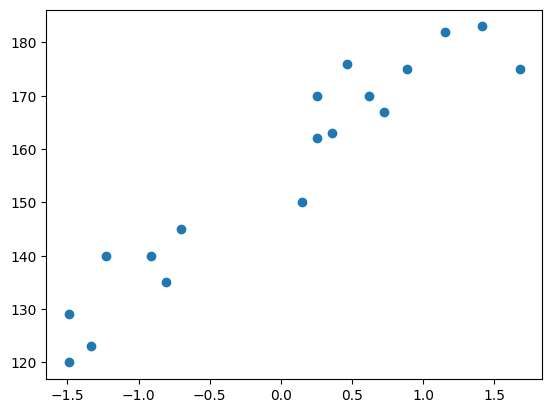

In [15]:
plt.scatter(x_train,y_train)

In [16]:
scaler.transform([[80]])

c:\Users\abc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.35779742]])

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regressor = LinearRegression()

In [19]:
regressor.fit(x_train,y_train)  # jyare data ne only set krva hoi tyare

LinearRegression()

In [20]:
regressor.intercept_    # B0 -> Y-Intercept 

155.83333333333334

In [21]:
regressor.coef_     # B1 -> Coeficeint of slope

array([19.2174361])

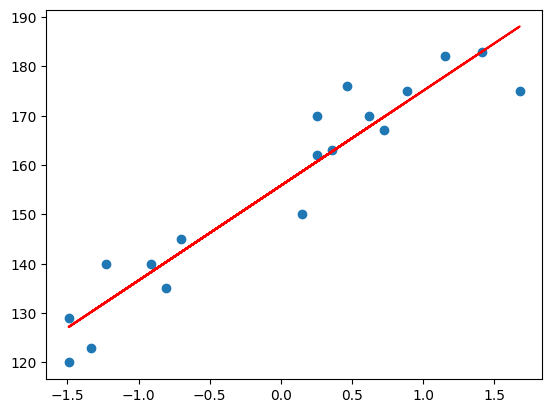

In [22]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),'r')

# # Perdiction of train data
# 1. predict_train_data = intercept + (coeficint_of_slope * Weight)
# (In Code) predict_train_data = regressor.intercept_ + (regressor.coef_ * Weight)

In [23]:
y_pred_test = regressor.predict(x_test)
y_pred_test

array([154.59340811, 147.49201817, 177.92654648, 160.68031377,
       152.56443955])

In [24]:
x_test,y_test

(array([[-0.06452085],
        [-0.43404932],
        [ 1.14964416],
        [ 0.25221785],
        [-0.17010041]]),
 22    160
 17    159
 11    182
 15    177
 4     160
 Name: Height, dtype: int64)

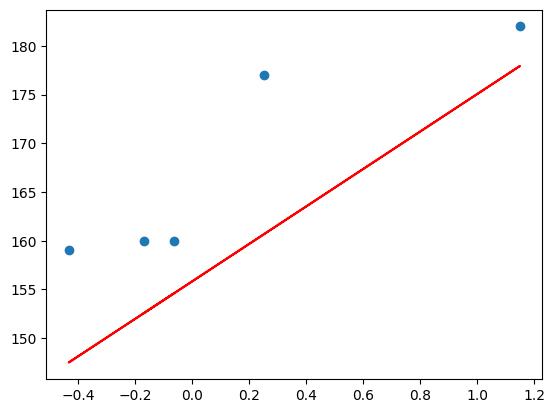

In [25]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regressor.predict(x_test),'r')